In [1]:
import pandas as pd

# Muat dataset dari file CSV
df = pd.read_csv('predic_tabel.csv')

# --- Bagian 1: Informasi Umum Dataset ---
print("====================================")
print("INFORMASI UMUM DATASET")
print("====================================")
print(f"Jumlah baris dan kolom: {df.shape}")
print("\nLima baris pertama dataset:")
print(df.head())





INFORMASI UMUM DATASET
Jumlah baris dan kolom: (30000, 11)

Lima baris pertama dataset:
   No  Usia Jenis_Kelamin Merokok Bekerja Rumah_Tangga Aktivitas_Begadang  \
0   1   Tua          Pria   Pasif   Tidak           Ya                 Ya   
1   2   Tua          Pria   Aktif   Tidak           Ya                 Ya   
2   3  Muda          Pria   Aktif   Tidak           Ya                 Ya   
3   4   Tua          Pria   Aktif      Ya        Tidak              Tidak   
4   5  Muda        Wanita   Pasif      Ya        Tidak              Tidak   

  Aktivitas_Olahraga Asuransi Penyakit_Bawaan  Hasil  
0             Sering      Ada           Tidak     Ya  
1             Jarang      Ada             Ada  Tidak  
2             Jarang      Ada           Tidak  Tidak  
3             Jarang      Ada             Ada  Tidak  
4             Sering    Tidak             Ada     Ya  


In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Muat data dari file CSV
df = pd.read_csv('predic_tabel.csv')

# Pisahkan fitur (X) dari kolom target ('Hasil')
X = df.drop(['No', 'Hasil'], axis=1)

# Inisialisasi encoder
encoder = OrdinalEncoder()

# Terapkan encoder ke data X
X_encoded = encoder.fit_transform(X)

# --- Output untuk Perbandingan ---
print("====================================")
print("DATA ASLI (SEBELUM ENCODING)")
print("====================================")
print(X.head())

print("\n\n====================================")
print("DATA SETELAH ENCODING")
print("====================================")



X_encoded_df = pd.DataFrame(X_encoded, columns=X.columns)
print(X_encoded_df.head())

DATA ASLI (SEBELUM ENCODING)
   Usia Jenis_Kelamin Merokok Bekerja Rumah_Tangga Aktivitas_Begadang  \
0   Tua          Pria   Pasif   Tidak           Ya                 Ya   
1   Tua          Pria   Aktif   Tidak           Ya                 Ya   
2  Muda          Pria   Aktif   Tidak           Ya                 Ya   
3   Tua          Pria   Aktif      Ya        Tidak              Tidak   
4  Muda        Wanita   Pasif      Ya        Tidak              Tidak   

  Aktivitas_Olahraga Asuransi Penyakit_Bawaan  
0             Sering      Ada           Tidak  
1             Jarang      Ada             Ada  
2             Jarang      Ada           Tidak  
3             Jarang      Ada             Ada  
4             Sering    Tidak             Ada  


DATA SETELAH ENCODING
   Usia  Jenis_Kelamin  Merokok  Bekerja  Rumah_Tangga  Aktivitas_Begadang  \
0   1.0            0.0      1.0      0.0           1.0                 1.0   
1   1.0            0.0      0.0      0.0           1.0          



Ukuran Data Latih:
Fitur (X_train): (24000, 9)
Label (y_train): (24000,)

Ukuran Data Uji:
Fitur (X_test): (6000, 9)
Label (y_test): (6000,)
Akurasi Model Naive Bayes: 87.50%

Laporan Klasifikasi:
              precision    recall  f1-score   support

       Tidak       0.88      0.88      0.88      3075
          Ya       0.87      0.87      0.87      2925

    accuracy                           0.88      6000
   macro avg       0.87      0.87      0.87      6000
weighted avg       0.87      0.88      0.87      6000


Confusion Matrix:
[[2705  370]
 [ 380 2545]]


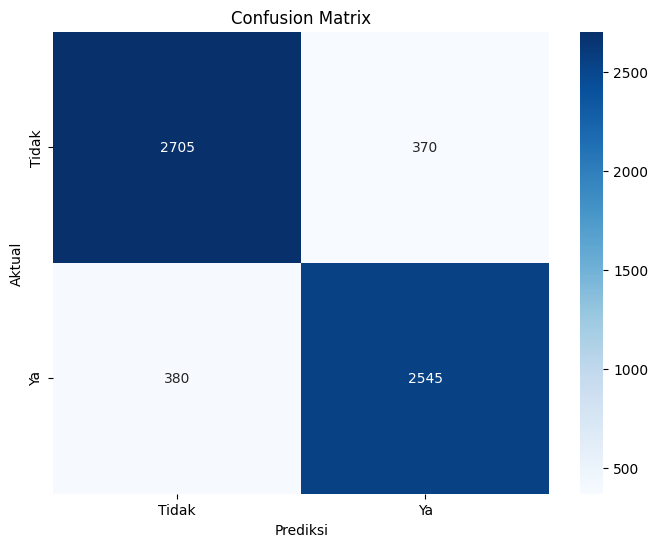

In [ ]:
# 1. Impor Pustaka yang Dibutuhkan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
# Mengubah impor model dari Decision Tree ke Naive Bayes
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Impor pustaka untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Muat dan Siapkan Dataset

df = pd.read_csv('predic_tabel.csv')

# Pisahkan fitur (X) dan target (y)

X = df.drop(['No', 'Hasil'], axis=1)
y = df['Hasil']

# 3. Encoding Fitur Kategorikal
encoder = OrdinalEncoder()
X_encoded = encoder.fit_transform(X)

# Dapatkan nama-nama fitur untuk label grafik
feature_names = X.columns.tolist()
class_names = ['Tidak', 'Ya']

# 4. Bagi Data Latih dan Data Uji
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

print("\n\nUkuran Data Latih:")
print("Fitur (X_train):", X_train.shape)
print("Label (y_train):", y_train.shape)

print("\nUkuran Data Uji:")
print("Fitur (X_test):", X_test.shape)
print("Label (y_test):", y_test.shape)

# 5. Latih Model Naive Bayes
# Menggunakan model CategoricalNB untuk data kategorikal
model_nb = CategoricalNB()
model_nb.fit(X_train, y_train)

# 6. Prediksi dan Evaluasi
y_pred = model_nb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Akurasi Model Naive Bayes: {accuracy*100:.2f}%')
print('\nLaporan Klasifikasi:')
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix:')
print(cm)

# 7. Visualisasi Confusion Matrix (Grafik Kotak)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('Aktual')
plt.xlabel('Prediksi')
plt.show()
